<a href="https://colab.research.google.com/github/vahid-nejad/Keras_LTMS_timeseries_predictions/blob/main/keras_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
# importing the necessary packages
import numpy as np
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.models import Sequential

In [203]:
# preparing data set
def prepareDateSet(timeSeriesData,numberOfSteps=3):
    x,y=[],[]
    for i in range(len(timeSeriesData)):
        currentYIndex= i+numberOfSteps
        if currentYIndex > len(timeSeriesData) - 1:
            break
        x.append(timeSeriesData[i:currentYIndex])
        y.append(timeSeriesData[currentYIndex])

    return np.array(x) ,np.array(y)


In [204]:
timeSeriesData = [115, 130, 120, 145, 160, 150, 165, 180, 170, 185,200,190,220,250,240,270,310,300]
# choose a number of time steps
numberOfSteps = 3
# split into samples
X, y = prepareDateSet(timeSeriesData, n_steps)

In [205]:
print(X)
print(y)

[[115 130 120]
 [130 120 145]
 [120 145 160]
 [145 160 150]
 [160 150 165]
 [150 165 180]
 [165 180 170]
 [180 170 185]
 [170 185 200]
 [185 200 190]
 [200 190 220]
 [190 220 250]
 [220 250 240]
 [250 240 270]
 [240 270 310]]
[145 160 150 165 180 170 185 200 190 220 250 240 270 310 300]


In [206]:
X.shape

(15, 3)

In [207]:
# turn the x array into a 3 dimensional array
numberOfFeature = 1
X=X.reshape(X.shape[0],X.shape[1],numberOfFeature)

In [208]:
X.shape

(15, 3, 1)

#Building the LSTM model

In [209]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(numberOfSteps, numberOfFeature)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

In [210]:
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 39532.2734
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 38258.0898
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 37105.4727
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 36066.6914
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 35093.5898
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 34137.2539
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 33160.3477
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 32129.1543
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 30992.2598
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 29687.8945
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 28163.5176
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 26397.6758
Epoch 13/10

#Making predictions

In [211]:
def makePredictions(numberOfPredictions,timeSeriesData):
    inputData=timeSeriesData[-3:]
    outPut=[]
    for i in range(numberOfPredictions):
        x_input=np.array(inputData).astype('float32').reshape(1,numberOfSteps,numberOfFeature)
        
        y=model.predict(x_input)
        outPut.append(y[0][0])
        inputData.append(y)
        inputData=inputData[1:]
    return outPut

In [212]:
predictions=makePredictions(10, timeSeriesData)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [213]:
predictions

[333.10193,
 369.25677,
 373.34018,
 408.5355,
 445.47516,
 461.0792,
 499.69473,
 539.6488,
 566.1804,
 609.8019]

#Visualizing the outpot prediction

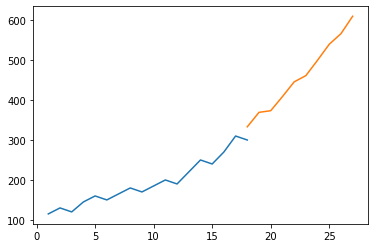

In [214]:
import matplotlib.pyplot as plt
day_new=np.arange(1,len(timeSeriesData)+1)
day_pred=np.arange(len(timeSeriesData),len(timeSeriesData)+10)

plt.plot(day_new,timeSeriesData)
plt.plot(day_pred,predictions)

#Let's increase the number of epochs and fit the model to see if we gets better result

In [215]:
model.fit(X, y, epochs=400, verbose=1)

Epoch 1/400
1/1 [==============================] - 0s 7ms/step - loss: 88.6497
Epoch 2/400
1/1 [==============================] - 0s 9ms/step - loss: 88.4424
Epoch 3/400
1/1 [==============================] - 0s 7ms/step - loss: 88.2819
Epoch 4/400
1/1 [==============================] - 0s 6ms/step - loss: 88.1325
Epoch 5/400
1/1 [==============================] - 0s 10ms/step - loss: 87.9660
Epoch 6/400
1/1 [==============================] - 0s 7ms/step - loss: 87.7537
Epoch 7/400
1/1 [==============================] - 0s 8ms/step - loss: 87.4873
Epoch 8/400
1/1 [==============================] - 0s 7ms/step - loss: 87.2119
Epoch 9/400
1/1 [==============================] - 0s 7ms/step - loss: 86.9804
Epoch 10/400
1/1 [==============================] - 0s 8ms/step - loss: 86.6149
Epoch 11/400
1/1 [==============================] - 0s 10ms/step - loss: 86.3306
Epoch 12/400
1/1 [==============================] - 0s 8ms/step - loss: 86.0619
Epoch 13/400
1/1 [=============================

In [216]:
predictions=makePredictions(10, timeSeriesData)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


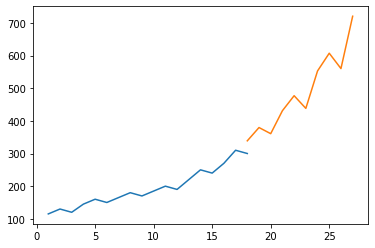

In [217]:
plt.plot(day_new,timeSeriesData)
plt.plot(day_pred,predictions)

#This time we get a better prediction line